# Skin Cancer Classification

In [20]:
import cv2
import pandas as pd
import numpy as np
import os

In [21]:
labels = ['Cancer', 'Non_Cancer'] 
img_path = 'Skin_Data/'

In [22]:
img_list = []
label_list = []
for label in labels:
    for img in os.listdir(img_path + label):
        img_list.append(img_path + label + '/' + img)
        label_list.append(label)

In [23]:
df = pd.DataFrame({
    'img': img_list,
    'label': label_list
})

In [24]:
df

,img,label
0,Skin_Data/Cancer/1780.JPG,Cancer
1,Skin_Data/Cancer/1654-1.jpg,Cancer
2,Skin_Data/Cancer/2664-2.JPG,Cancer
3,Skin_Data/Cancer/1007-1.jpg,Cancer
4,Skin_Data/Cancer/1543.JPG,Cancer
...,...,...
285,Skin_Data/Non_Cancer/63-1.JPG,Non_Cancer
286,Skin_Data/Non_Cancer/911-2.JPG,Non_Cancer
287,Skin_Data/Non_Cancer/937-1.JPG,Non_Cancer
288,Skin_Data/Non_Cancer/1834-01.JPG,Non_Cancer


In [25]:
import matplotlib.pyplot as plt

In [26]:
d = {'Cancer': 1, 'Non_Cancer': 0}

In [27]:
df['encode_label'] = df['label'].map(d)

In [28]:
df.sample(10)

,img,label,encode_label
286,Skin_Data/Non_Cancer/911-2.JPG,Non_Cancer,0
72,Skin_Data/Cancer/801.JPG,Cancer,1
218,Skin_Data/Non_Cancer/1277-1.JPG,Non_Cancer,0
251,Skin_Data/Non_Cancer/1928-02.JPG,Non_Cancer,0
51,Skin_Data/Cancer/DSC_0061.JPG,Cancer,1
26,Skin_Data/Cancer/650-1.JPG,Cancer,1
248,Skin_Data/Non_Cancer/1501-2.JPG,Non_Cancer,0
261,Skin_Data/Non_Cancer/19-1.JPG,Non_Cancer,0
20,Skin_Data/Cancer/1714-01.jpg,Cancer,1
30,Skin_Data/Cancer/1877.JPG,Cancer,1


In [29]:
df.drop( df[df['img'] == 'Skin_Data/Non_Cancer/.DS_Store'].index , inplace=True)
df.drop( df[df['img'] == 'Skin_Data/Cancer/.DS_Store'].index , inplace=True)

In [30]:
x = []
for img in df['img']:
    image = cv2.imread(img)
    if image is not None:
        image = cv2.resize(image, (170, 170))  # Resize
        image = image / 255.0  # Normalize
        x.append(image)
    else:
        print(f"Warning: Image at path {img} could not be loaded.")


In [31]:
x = np.array(x)

In [32]:
y = df['encode_label']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Reshape

In [36]:
# CNN - Convolutional Neural Network

In [37]:
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax')) # 2 different classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.6276 - loss: 6.7092 - val_accuracy: 0.7414 - val_loss: 1.6384
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.6764 - loss: 1.2853 - val_accuracy: 0.7586 - val_loss: 0.5224
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.7352 - loss: 0.5704 - val_accuracy: 0.7241 - val_loss: 0.5027
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.7977 - loss: 0.4589 - val_accuracy: 0.7586 - val_loss: 0.4097
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.8564 - loss: 0.3785 - val_accuracy: 0.8276 - val_loss: 0.3866
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.8359 - loss: 0.3734 - val_accuracy: 0.7759 - val_loss: 0.4857
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.8068 - loss: 0.4630 - val_accuracy: 0.7931 - val_loss: 0.4316
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.8109 - loss: 0.4155 - val_accuracy: 0.7931 - val_loss:

In [39]:
model.save('skin_cancer.h5')

# Transfer Learning

In [40]:
#VGGNET, ResNet, Inceptionv3, Xception, MobileNetv2

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
data_dir = 'Skin_Data'
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_datagenerator = train_datagen.flow_from_directory(directory=data_dir, target_size=(img_width, img_height), 
                                   class_mode='binary', subset='training')

test_datagenerator = train_datagen.flow_from_directory(directory=data_dir, target_size=(img_width, img_height), 
                                   class_mode='binary', subset='validation')

base_model = ResNet50(weights='imagenet', input_shape=(img_width, img_height, 3), include_top=False)
model = Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_datagenerator, epochs=10, validation_data=test_datagenerator)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5019 - loss: 11.7017 - val_accuracy: 0.7143 - val_loss: 0.9975
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6897 - loss: 1.0945 - val_accuracy: 0.2857 - val_loss: 1.1018
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4855 - loss: 0.8595 - val_accuracy: 0.7143 - val_loss: 0.6150
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5376 - loss: 0.6929 - val_accuracy: 0.7143 - val_loss: 0.6434
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6849 - loss: 0.6870 - val_accuracy: 0.7143 - val_loss: 0.5737
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6893 - loss: 0.5958 - val_accuracy: 0.7143 - val_loss: 0.5672
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6918 - loss: 0.6124 - val_accuracy: 0.7143 - val_loss: 0.6264
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7197 - loss: 0.5782 - val_accuracy: 0.7143 - val_loss: 0.5563
Epoch 9/10
8/8 ━━━

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,875,205 (1.24 GB)

 Trainable params: 102,762,497 (392.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 205,524,996 (784.02 MB)

In [49]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from IPython.display import Image

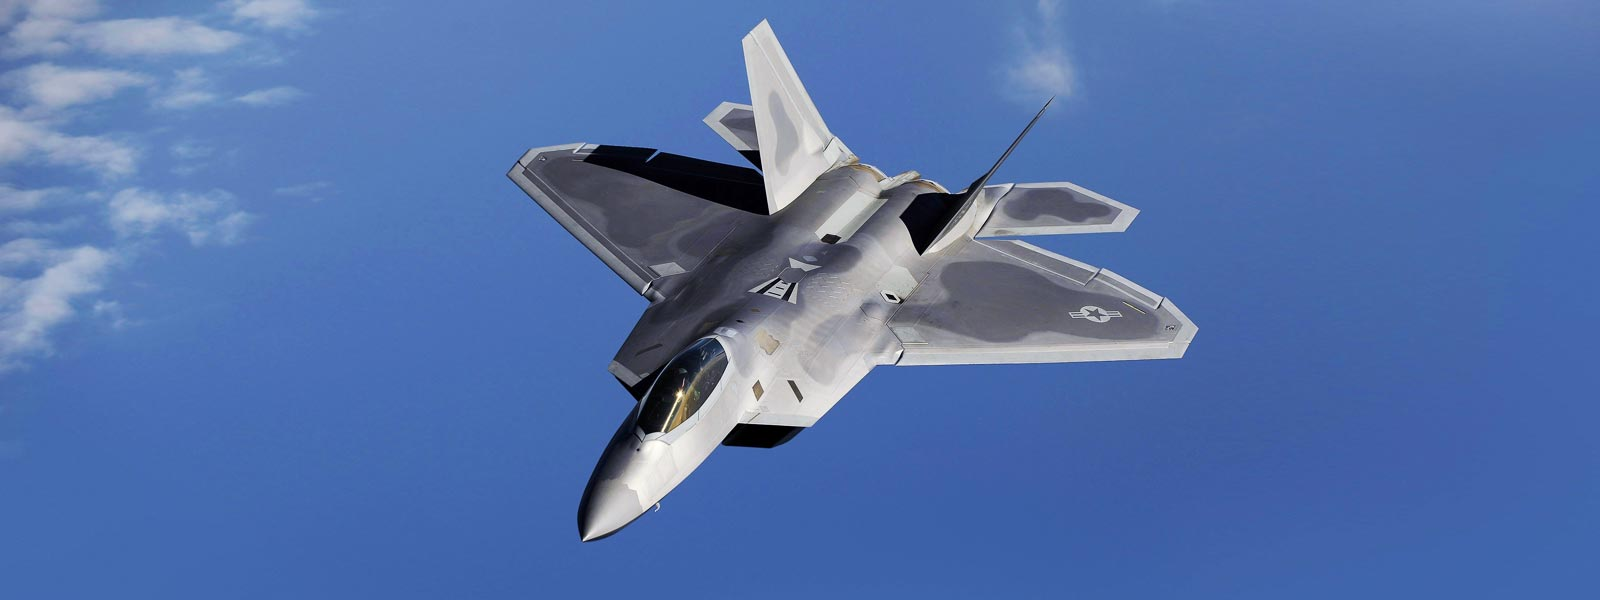

In [51]:
Image('fighter jet.jpg')

In [45]:
img = image.load_img('fighter jet.jpg', target_size=(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [46]:
model = ResNet50(weights='imagenet')

In [47]:
pred = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


In [48]:
decode_predictions(pred, top=1)[0]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


[('n04552348', 'warplane', 0.63783884)]